In [5]:
using PyPlot
plt = PyPlot

PyPlot

In [7]:
#pass in s-box an array and its dimension nXm
function transformSbox(sbox,n,m)
    #n-bit input #m-bit output
    F_components = zeros(Int,m,2^n)
    for i in 1:2^n
        val = sbox[i]
        bin_val = bin(val,m)
        for j in 1:m
            F_components[j,i] = parse(Int,bin_val[j])
        end
    end
    F_components
end

transformSbox (generic function with 1 method)

In [10]:
S_box = [
0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
];

8×256 Array{Int64,2}:
 0  0  0  0  1  0  0  1  0  0  0  0  1  …  1  1  0  0  0  1  0  0  1  0  1  0
 1  1  1  1  1  1  1  1  0  0  1  0  1     0  1  1  1  1  0  0  0  0  1  0  0
 1  1  1  1  1  1  1  0  1  0  1  1  1     1  1  0  1  0  0  1  0  1  0  1  0
 0  1  1  1  1  0  0  0  1  0  0  0  1     1  0  0  0  0  1  0  0  1  1  1  1
 0  1  0  1  0  1  1  0  0  0  0  1  1     1  0  0  1  0  1  1  1  0  0  1  0
 0  1  1  0  0  0  1  1  0  0  1  0  1  …  1  1  0  0  0  0  1  1  0  1  0  1
 1  0  1  1  1  1  1  0  0  0  1  1  1     1  1  1  0  0  0  0  1  0  0  1  1
 1  0  1  1  0  1  1  1  0  1  1  1  0     1  0  0  0  1  1  1  1  0  0  1  0

In [4]:
#cross-correlation of cryptographic functions
function cross_corr(f1,f2,y)
    sum = 0
    n_inp = length(f1)
    for x in 0:n_inp-1
        sum += (-1)^(f1[x+1]$(f2[x$y+1]))
    end
    sum
end

cross_corr (generic function with 1 method)

In [13]:
cross_corr(Fsbox[1,:],Fsbox[2,:],1)

4

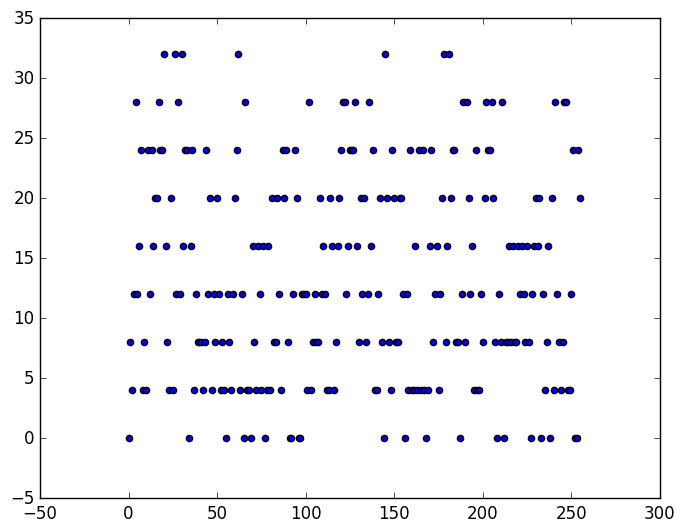

PyObject <matplotlib.collections.PathCollection object at 0x7f06aa78f390>

In [7]:
Y = zeros(Int,256)
for y in 0:255
    Y[y+1] = abs(cross_corr(Fsbox[1,:],Fsbox[8,:],y))
end
plt.scatter(0:255,Y)

In [1]:
function mybool(val,n)
    binval = bin(val,n)
    binarr = Int[]
    for i in 1:n
        push!(binarr,parse(Int,binval[i]))
    end
    binarr
end

mybool (generic function with 1 method)

In [2]:
mybool(1,8)

8-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 1

In [51]:
#Fsbox is suppose to be the 2D array consisting of component functions of S-box
#β is suppose to be output of mybool
#n,m are dimension of sboxes
#k_original is the subkey being used with the s_box in the paper it has been taken as 0
function newTO(Fsbox, β, k_original, n, m)
    term1 = m
    sum = 0
    for a in 0:(2^n)-1
        if(a != k_original)
            tj = 0
            for j in 1:m
                ti = 0
                for i in 1:m
                    ti += ((-1)^(β[i]$β[j]))*cross_corr(Fsbox[i,:],Fsbox[j,:],a)
                end
                tj += abs(ti)
            end
            sum += tj
        end
    end

    coeff = 1/(2^(2*n) - 2^n)
    return (m - coeff*sum)
end

newTO (generic function with 1 method)

In [ ]:
#Fsbox is suppose to be the 2D array consisting of component functions of S-box
#β is suppose to be output of mybool
#n,m are dimension of sboxes
#k_original is the subkey being used with the s_box in the paper it has been taken as 0
function newTO2(Fsbox, β, k_original, n, m)
    term1 = m
    sum = 0
    for a in 0:(2^n)-1
        if(a != k_original)
            tj = 0
            for j in 1:m
                s1 = (-1)^(β[j])*cross_corr(Fsbox[j,:],Fsbox[j,:],a)
                ti = 0
                for i in 1:m
                    if(i != j)
                        ti += (-1)^(β[i])*cross_corr(Fsbox[i,:],Fsbox[j,:],a)
                    end
                end
                tj += abs(s1 + ti)
            end
            sum += tj
        end
    end

    coeff = 1/(2^(2*n) - 2^n)
    return (m - coeff*sum)
end

In [21]:
n=8
(2^(2*n) - 2^n)*2

130560

In [52]:
newTO(Fsbox, [0,0,0,1,0,0,1,1], 255, 8, 8)

6.794975490196078

In [12]:
unit_size = 8
β_container = []
for i in 0:2^unit_size-1
    push!(β_container,mybool(i,unit_size))
end
β_container

256-element Array{Any,1}:
 Any[0,0,0,0,0,0,0,0]
 Any[0,0,0,0,0,0,0,1]
 Any[0,0,0,0,0,0,1,0]
 Any[0,0,0,0,0,0,1,1]
 Any[0,0,0,0,0,1,0,0]
 Any[0,0,0,0,0,1,0,1]
 Any[0,0,0,0,0,1,1,0]
 Any[0,0,0,0,0,1,1,1]
 Any[0,0,0,0,1,0,0,0]
 Any[0,0,0,0,1,0,0,1]
 Any[0,0,0,0,1,0,1,0]
 Any[0,0,0,0,1,0,1,1]
 Any[0,0,0,0,1,1,0,0]
 ⋮                   
 Any[1,1,1,1,0,1,0,0]
 Any[1,1,1,1,0,1,0,1]
 Any[1,1,1,1,0,1,1,0]
 Any[1,1,1,1,0,1,1,1]
 Any[1,1,1,1,1,0,0,0]
 Any[1,1,1,1,1,0,0,1]
 Any[1,1,1,1,1,0,1,0]
 Any[1,1,1,1,1,0,1,1]
 Any[1,1,1,1,1,1,0,0]
 Any[1,1,1,1,1,1,0,1]
 Any[1,1,1,1,1,1,1,0]
 Any[1,1,1,1,1,1,1,1]

In [13]:
#constructing HW look up table for this
H = Dict()
for β in β_container
    count = 0
    for i in β
        if(i == 1)
            count += 1
        end
    end
    H[β] = count
end
H

Dict{Any,Any} with 256 entries:
  Any[0,1,1,0,0,0,0,1] => 3
  Any[1,1,1,0,0,0,0,1] => 4
  Any[0,0,1,1,0,1,0,1] => 4
  Any[1,0,1,0,1,0,0,0] => 3
  Any[1,0,1,0,0,0,0,0] => 2
  Any[0,1,1,0,1,1,0,1] => 5
  Any[1,0,0,0,1,1,0,1] => 4
  Any[1,1,0,1,1,1,0,1] => 6
  Any[1,1,0,0,0,1,1,0] => 4
  Any[1,1,0,1,1,1,1,0] => 6
  Any[0,0,1,0,0,1,0,0] => 2
  Any[0,0,0,0,0,0,1,1] => 2
  Any[1,1,0,0,1,1,1,0] => 5
  Any[0,0,1,1,1,0,1,0] => 4
  Any[0,0,1,0,1,0,0,1] => 3
  Any[1,1,1,1,0,0,1,0] => 5
  Any[0,0,1,1,0,0,0,1] => 3
  Any[1,0,1,0,1,0,1,0] => 4
  Any[0,0,0,1,0,0,1,1] => 3
  Any[0,0,0,1,0,1,1,1] => 4
  Any[1,0,1,0,0,1,0,0] => 3
  Any[0,0,1,1,1,0,0,1] => 4
  Any[1,0,0,0,0,0,1,0] => 2
  Any[0,0,0,0,0,1,0,1] => 2
  Any[0,1,1,0,1,1,0,0] => 4
  ⋮                    => ⋮

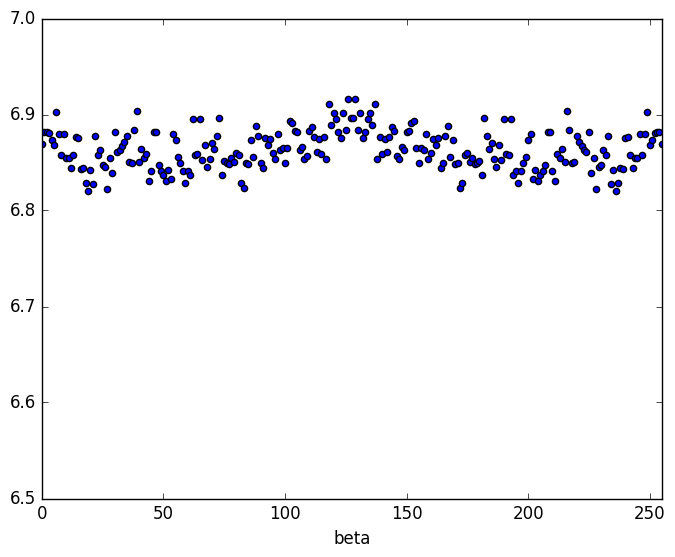

In [55]:
Y = zeros(2^unit_size)
i = 1
for β in β_container
    Y[i] = newTO(Fsbox,β,0,8,8)
    i +=1
end
plt.scatter(0:255, Y)
plt.xlim(0,255)
plt.ylim(6.5,7.0)
xlabel("beta")
plt.savefig("TO_F_beta.png")

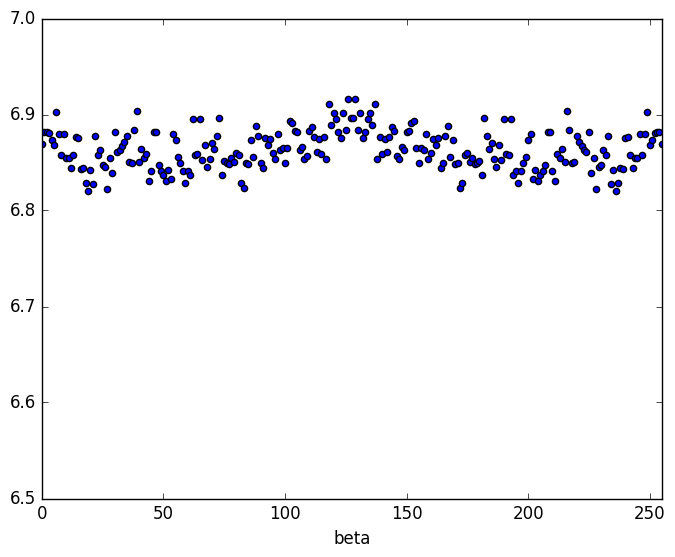

In [42]:
Y = zeros(2^unit_size)
i = 1
for β in β_container
    Y[i] = newTO(Fsbox,β,0,8,8)
    i +=1
end
plt.scatter(0:255, Y)
plt.xlim(0,255)
plt.ylim(6.5,7.0)
xlabel("beta")
plt.savefig("TO_F_beta.png")

In [35]:
function new_τ(Fsbox, β, k_original, n, m)
    term1 = abs(m - 2*H[β])
    coeff = 1/(2^(2*n) - 2^n)
    
    sum = 0
    for a in 0:(2^n)-1
        if(a != k_original)
            tj = 0
            for j in 1:m
                #s1 = (-1)^(β[j])*cross_corr(Fsbox[j,:],Fsbox[j,:],a)
                ti = 0
                for i in 1:m
                    if(i != j)
                        ti += (-1)^(β[i]$β[j])*cross_corr(Fsbox[i,:],Fsbox[j,:],a)
                    end
                end
                tj += ti
            end
            sum += abs(tj)
        end
    end
    term2 = -1*coeff*sum
    term1+term2
end             

new_τ (generic function with 1 method)

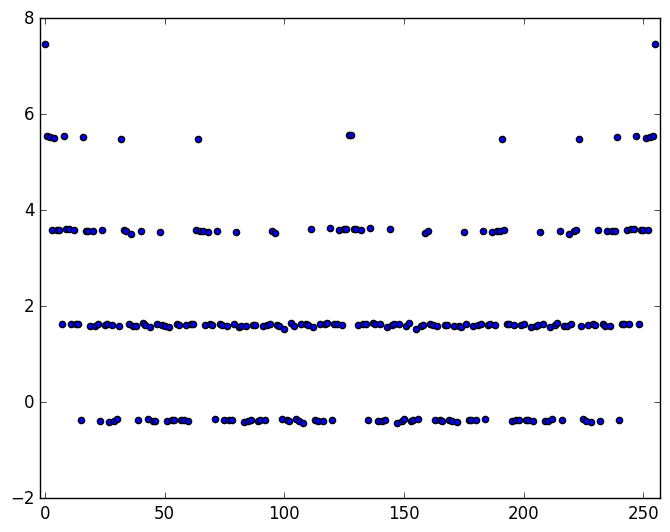

(-2,8)

In [30]:
Y = []
for β in β_container
    push!(Y,new_τ(Fsbox,β,0,8,8))
end
plt.scatter(0:255,Y)
plt.xlim(-2,257)
plt.ylim(-2, 8)